## Requirement:

Airline wanted to undertand the sentiment of the customer related to these products. For that we were given tweets about the products, the ask was to predict whether the tweets contains Positive/Negative/Neutral sentiments about the products.

We were given Text string and we have to categorize the text into predefined categories.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"

In [3]:
airline_tweets = pd.read_csv(data_source_url)

In [4]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
airline_tweets.shape

(14640, 15)

In [6]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
airline_tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [8]:
airline_tweets.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
airline_tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [10]:
airline_tweets["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [11]:
airline_tweets["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

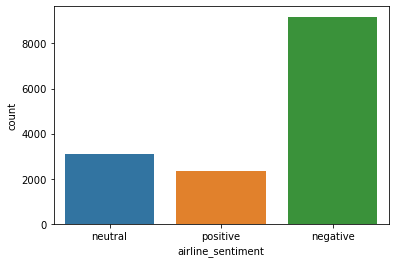

In [12]:
sns.countplot(x = "airline_sentiment", data = airline_tweets)

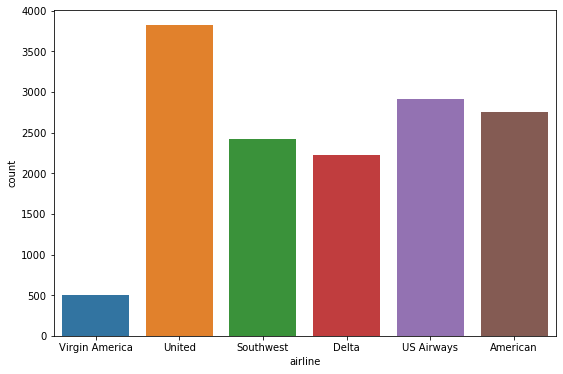

In [14]:
plt.figure(figsize = (9,6))
sns.countplot(x = "airline", data = airline_tweets)
plt.show()

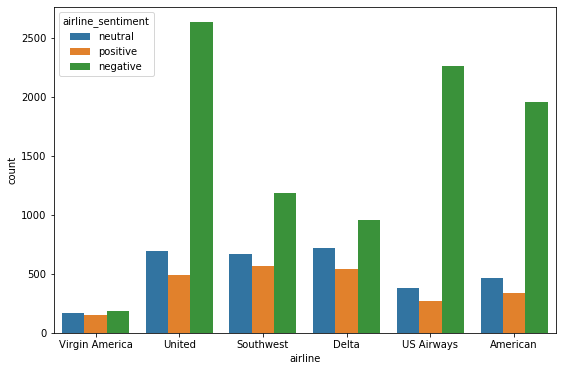

In [15]:
plt.figure(figsize = (9,6))
sns.countplot(x = "airline", data = airline_tweets, hue = "airline_sentiment")
plt.show()

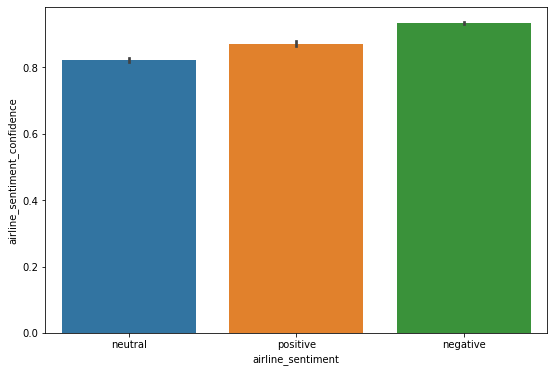

In [16]:
plt.figure(figsize = (9,6))
sns.barplot(x = "airline_sentiment", y = "airline_sentiment_confidence", data = airline_tweets)
plt.show()

In [17]:
data = airline_tweets[["text","airline_sentiment"]]
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


## Steps in data cleansing:
1. Cleansing of data -- using Regular Expression
2. Removing Stopwords for the data
3. Converting the words into its base form by using Stemming technique such as Porter Stemmer or Snowball Stemmer

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

text = re.sub("[^ a-zA-Z]", " ", data["text"][0])
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(x) for x in text if not x in set(stopwords.words("english"))]
text = " ".join(text)
text

'virginamerica dhepburn said'

In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

text = re.sub("[^ a-zA-Z]", " ", data["text"][0])
text = text.lower()
text = text.split()
ss = SnowballStemmer("english", ignore_stopwords = False)
text = [ss.stem(x) for x in text if not x in set(stopwords.words("english"))]
text = " ".join(text)
text

'virginamerica dhepburn said'

In [23]:
data.index

RangeIndex(start=0, stop=14640, step=1)

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

corpus = []

for i in range(0,14640):
    text = re.sub("[^ a-zA-Z]", " ", data["text"][i])
    text = text.lower()
    text = text.split()
    ss = SnowballStemmer("english", ignore_stopwords = False)
    text = [ss.stem(x) for x in text if not x in set(stopwords.words("english"))]
    text = " ".join(text)
    corpus.append(text)

## Bag of words creation

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
X.shape

(14640, 10802)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
X_1 = tv.fit_transform(corpus).toarray()
X_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
X_1.shape

(14640, 10802)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
X.shape

(14640, 2500)

In [30]:
Y = data.iloc[:,-1].values

In [31]:
Y

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

## Splitting of data into train and test

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 101)

## Model Creation -- Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 200, random_state = 101)
model.fit(X_train,Y_train)

Y_predict = model.predict(X_test)

In [34]:
print("Training score: ", round(model.score(X_train, Y_train),3))
print("Test score: ", round(model.score(X_test, Y_test),3))

Training score:  0.994
Test score:  0.745


## Model Evaluation

In [35]:
Compare = pd.DataFrame({"Actual value":Y_test, "Predicted Value": Y_predict})
Compare

,Actual value,Predicted Value
0,positive,positive
1,negative,negative
2,neutral,negative
3,positive,positive
4,negative,negative
...,...,...
4387,negative,negative
4388,neutral,positive
4389,negative,negative
4390,negative,negative


In [36]:
from sklearn.metrics import accuracy_score

print("Accuracy Score: ", round(accuracy_score(Y_test, Y_predict), 3))

Accuracy Score:  0.745


In [37]:
from sklearn.metrics import classification_report

Classification_report = classification_report(Y_test, Y_predict)
print(Classification_report)

              precision    recall  f1-score   support

    negative       0.80      0.89      0.84      2738
     neutral       0.57      0.44      0.49       947
    positive       0.69      0.59      0.63       707

    accuracy                           0.74      4392
   macro avg       0.68      0.64      0.66      4392
weighted avg       0.73      0.74      0.73      4392



In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_predict)
print(confusion_matrix)

[[2440  210   88]
 [ 433  416   98]
 [ 183  110  414]]


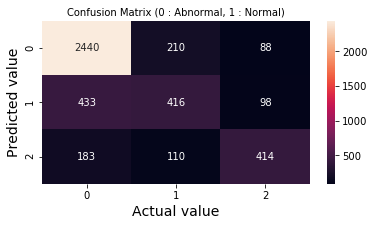

In [39]:
plt.figure(figsize = (6,3))
sns.heatmap(confusion_matrix, annot = True, fmt = "g")
plt.xlabel("Actual value", fontsize = 14)
plt.ylabel("Predicted value", fontsize = 14)
plt.title("Confusion Matrix (0 : Abnormal, 1 : Normal)", fontsize = 10)
plt.show()